In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

### **Parte 2**

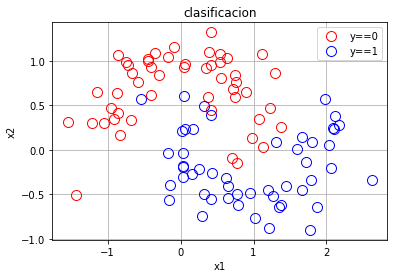

In [ ]:


opc=3

#seleccionamos  como menu la opcion que queremos de los siguientes casos
if opc == 1:
  # Extraemos vectores
  df = pd.read_csv('df_clasificacion_1.cvs')
  x1=np.asanyarray(df[['x1']])
  x2=np.asanyarray(df[['x2']])

elif opc==2:
  # Extraemos vectores
  df = pd.read_csv('df_clasificacion_2.cvs')
  x1=np.asanyarray(df[['x1']])
  x2=np.asanyarray(df[['x2']])

else:
  # Extraemos vectores
  df = pd.read_csv('df_clasificacion_3.cvs')
  x1=np.asanyarray(df[['x1']])
  x2=np.asanyarray(df[['x2']])





x=np.concatenate((x1,x2),axis=1)
y=np.asanyarray(df['y'])



plt.figure()
plt.grid()
plt.title('clasificacion')

plt.plot(x[y==0,0],x[y==0,1],'ro',fillstyle='none',markersize=10)
plt.plot(x[y==1,0],x[y==1,1],'bo',fillstyle='none',markersize=10)

plt.legend(['y==0','y==1'])
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()
x_t,x_ts,y_t,y_ts= train_test_split(x,y,test_size=0.2)

In [ ]:
  model = Sequential()
  model.add(Dense(32,activation='relu',input_shape=[2]))
  model.add(Dense(16,activation='relu'))
  model.add(Dense(1,activation='sigmoid'))
  model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
hist= model.fit(x_t,y_t,batch_size=10,epochs=1200,verbose=0,validation_data=(x_ts,y_ts))

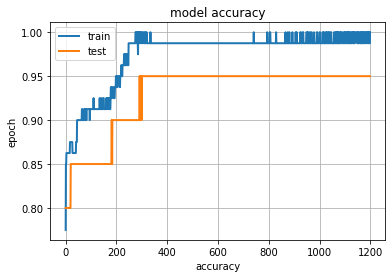

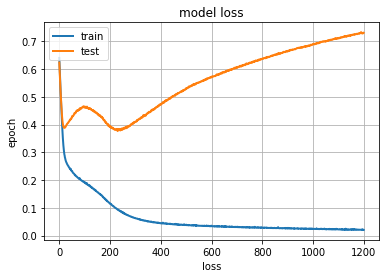

In [ ]:
plt.figure()
plt.grid()
plt.plot(hist.history['accuracy'],lw=2)
plt.plot(hist.history['val_accuracy'],lw=2)
plt.title('model accuracy')
plt.xlabel('accuracy')
plt.ylabel('epoch')
plt.legend(['train','test'],loc='upper left')

plt.show()


plt.figure()
plt.grid()
plt.plot(hist.history['loss'],lw=2)
plt.plot(hist.history['val_loss'],lw=2)
plt.title('model loss')
plt.xlabel('loss')
plt.ylabel('epoch')
plt.legend(['train','test'],loc='upper left')

plt.show()

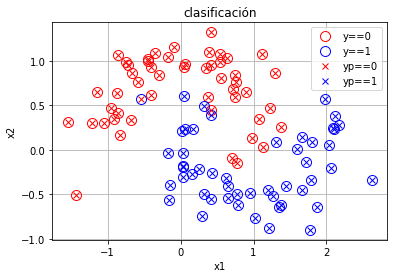

In [ ]:
ypred=model.predict(x)
ypred=ypred.ravel()>0.5


plt.figure()
plt.grid()
plt.title('clasificación')

plt.plot(x[y==0,0],x[y==0,1],'ro',fillstyle='none',markersize=10)
plt.plot(x[y==1,0],x[y==1,1],'bo',fillstyle='none',markersize=10)

plt.plot(x[ypred==0,0],x[ypred==0,1],'rx')
plt.plot(x[ypred==1,0],x[ypred==1,1],'bx')

plt.legend(['y==0','y==1','yp==0','yp==1'])
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

In [ ]:
print('metricas: \n',classification_report(y,ypred))
print('confusion matrix: \n', confusion_matrix(y,ypred))

metricas: 
               precision    recall  f1-score   support

         0.0       0.98      1.00      0.99        50
         1.0       1.00      0.98      0.99        50

    accuracy                           0.99       100
   macro avg       0.99      0.99      0.99       100
weighted avg       0.99      0.99      0.99       100

confusion matrix: 
 [[50  0]
 [ 1 49]]
